In [267]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [268]:
# Importing datasets
Xtrain = np.genfromtxt('Xtrain.csv', delimiter = ',')
Xtest = np.genfromtxt('Xtest.csv', delimiter = ',')
ytrain = np.genfromtxt('ytrain.csv', delimiter = ',')
ytest = np.genfromtxt('ytest.csv', delimiter = ',')

# Log transforming inputs due to small magnitude on the tails
Xtrain = np.log(Xtrain + 0.1)
Xtest = np.log(Xtest + 0.1)

# Transforming training and testing labels from {1, 0} to {1, -1}
for i in range(len(ytrain)):
    if ytrain[i] == 0:
        ytrain[i] = -1
for i in range(len(ytest)):
    if ytest[i] == 0:
        ytest[i] = -1

In [269]:
def L(w):
    tot = 0
    for i in range(Xtrain.shape[0]):
        tot += np.log(1 + np.exp(-ytrain[i]*w.T@Xtrain[i,:]))
    return tot
def sig(a):
    return 1/(1 + np.exp(-a))
def grad_L(w):
    mu = np.empty(Xtrain.shape[0])
    for i in range(Xtrain.shape[0]):
        t = sig(ytrain[i]*w.T@Xtrain[i,:])
        mu[i] = t
    return -Xtrain.T@(ytrain * (1 - mu))

# Problem 1

In [270]:
def gradientCheck(f, grad_f, x_0, flag):
    # flag = 1: finite difference
    # flag = 2: center difference
    n = len(np.array(x_0).flatten())
    h_arr = [1.5, 1.5e-1, 1.5e-2, 1.5e-3, 1.5e-4, 1.5e-5, 1.5e-6, 1.5e-7]
    g = np.zeros((len(h_arr),n))
    if flag == 1:
        for i, h in enumerate(h_arr): #different h values
            e = np.zeros(n)
            e[0] = 1
            for j in range(n): # number of dimensions
                # print(j)
                g[i][j] = (f(x_0 + h*e) - f(x_0))/h
                e = np.roll(e, 1)

        # check g vs gradient f
        out = np.zeros(len(h_arr))
        for i in range(len(h_arr)):
            out[i] = abs(np.linalg.norm(grad_f(x_0)) - np.linalg.norm(g[i,:]))/np.linalg.norm(g[i,:])
        return out
    if flag == 2:
        for i, h in enumerate(h_arr): #different h values
            e = np.zeros(n)
            e[0] = 1
            for j in range(n): # number of dimensions
                g[i][j] = (f(x_0 + h*e) - f(x_0 - h*e))/(2*h)
                e = np.roll(e, 1)

        # check g vs gradient f
        out = np.zeros(len(h_arr))
        for i in range(len(h_arr)):
            out[i] = abs(np.linalg.norm(grad_f(x_0)) - np.linalg.norm(g[i,:]))/np.linalg.norm(g[i,:])
        return out

In [271]:
# Method for checking the gradient
method = 2 # 1 is finite difference, 2 is center difference (a mix of both were tested)

In [272]:
def f(x):
    return 8*x
def grad_f(x):
    return 8

# Point to check gradient
x_0 = 3 # means f(3) = 24, f'(3) = 8

# defining functions as parameters
func = f
grad = grad_f

# checking gradient
out = gradientCheck(func, grad, x_0, method)
print(out)

[0.00000000e+00 5.55111512e-16 8.43769499e-15 3.79696274e-14
 6.30162589e-13 8.25184365e-12 1.39777967e-10 1.56281432e-10]


In [273]:
def f(x):
    return x**2
def grad_f(x):
    return 2*x

# Point to check gradient
x_0 = 3 # means f(3) = 9, f'(3) = 6

# defining functions as parameters
func = f
grad = grad_f

# checking gradient
out = gradientCheck(func, grad, x_0, 1)
print(out)

[2.00000000e-01 2.43902439e-02 2.49376559e-03 2.49937516e-04
 2.49993748e-05 2.49998077e-06 2.50112597e-07 2.55022056e-08]


In [274]:
def f(x):
    return x**3
def grad_f(x):
    return 3*x**2

# Point to check gradient
x_0 = -17 # means f(3) = -4913, f'(3) = 867

# defining functions as parameters
func = f
grad = grad_f

# checking gradient
out = gradientCheck(func, grad, x_0, method)
print(out)

[2.58843831e-03 2.59508836e-05 2.59515530e-07 2.59512786e-09
 3.65840834e-11 5.40674669e-11 5.40674669e-11 1.26422294e-08]


In [275]:
def f(x):
    return x[0]**2 + x[1]**2 + x[2]**2 + x[3]**2 + x[4]**2
def grad_f(x):
    return [2*x[0], 2*x[1], 2*x[2], 2*x[3], 2*x[4]]

# Point to check gradient
x_0 = [-24, 18, 1, 2, 3] # gradient should be 2 times each input

# defining functions as parameters
func = f
grad = grad_f

# checking gradient
out = gradientCheck(func, grad, x_0, 1)
print(out)

[1.53502504e-03 1.53853123e-05 1.53856637e-07 1.53851134e-09
 1.68644546e-11 7.50189782e-11 2.11688854e-10 8.00640855e-09]


In [276]:
def f(x):
    return x[0]**2 + x[1]**2 + x[2]**2 + x[3]**2 + x[4]**2
def grad_f(x):
    return [2*x[0], 2*x[1], 2*x[2], 2*x[3], 2.5*x[4]]

# Point to check gradient
x_0 = [-24, 18, 1, 2, 3] # gradient should be 2 times each input

# defining functions as parameters
func = f
grad = grad_f

# checking gradient
out = gradientCheck(func, grad, x_0, 2)
print(out)
print('This shows that you can detect incorrect gradients due to the massive increase in error for small scaling.')

[0.0027656  0.0027656  0.0027656  0.0027656  0.0027656  0.0027656
 0.0027656  0.00276559]
This shows that you can detect incorrect gradients due to the massive increase in error for small scaling.


In [277]:
# random starting point
w = np.random.rand(Xtrain.shape[1])

# defining functions as parameters
func = L
grad = grad_L

# checking gradient
out = gradientCheck(func, grad, w, 1)
print(out)

[6.92821855e-14 1.11453951e-13 1.34234234e-12 6.09833846e-12
 8.85900763e-11 2.08423180e-09 1.94989760e-08 5.12651556e-08]


In [278]:
# random starting point
w = np.random.rand(Xtrain.shape[1])

# defining functions as parameters
func = L
grad = grad_L

# checking gradient
out = gradientCheck(func, grad, w, 2)
print(out)

[2.02198552e-13 5.66683093e-14 2.27802838e-14 5.04310300e-12
 3.49270700e-11 9.40490043e-10 5.76769623e-09 4.72632030e-08]


# Problem 3

In [279]:
def gradientDescentSolver(x_0, f, grad_f, lam, steps, flag, rho, c, linesearch_flag):

    # Linesearch
    if linesearch_flag == 0:

        # Defining arrays and constants
        tol = 1e-4
        error = 10 # arbitrary to start
        x_n = np.array(x_0)
        error_arr = []
        i = 0

        # Gradient descent loop
        while error > tol:
            i += 1
            x_prev = x_n

            # updating weight (position)
            x_n = x_n - lam*grad_f(x_n)

            # early stopping
            if (i == steps) & (flag == 1):
                return x_n, error_arr, i

            # L-2 norm for error between points
            error = np.linalg.norm(x_n - x_prev)
            if i % 1000 == 0:
                print(f'Step: {i} | Error: {error}')
            error_arr.append(error)
        return x_n, error_arr, i

    # Gradient Descent
    else:
        t = 0.5 #optimal?
        p_k = -grad_f(x_0)
        while f(x_0 + t*p_k) > f(x_0) + c*t*grad_f(x_0)@p_k: #armijo condition
            t = rho*t
        return t

In [280]:
# Generating a random A and b matrix with full column rank to test gradient descent
A = np.random.rand(1000, 5)
b = np.random.rand(1000)
rank = np.linalg.matrix_rank(A)
print(f'Rank of matrix A: {rank} | Full column rank? {A.shape[1] == rank}')

Rank of matrix A: 5 | Full column rank? True


In [281]:
def f(x):
    return 0.5*np.linalg.norm(A@x - b)**2
def grad_f(x):
    return A.T@(A@x - b)

# Closed form solution to problem
x_optimal = np.linalg.inv(A.T@A)@A.T@b

# Defining functions as parameters
grad = grad_f
func = f

# Intializing random starting points
x_0 = np.random.rand(A.shape[1])
w = np.random.rand(A.shape[1])

# Checking to see if the gradient calculated is correct
out = gradientCheck(func, grad, w, 2)
print(f'Gradient Check Error: {out}')

# Defining learning rate with spectral norm, rho, and c for linesearch option
L = np.linalg.norm(A,2)**2
lam = 1/L
rho = 0.9
c = 0.5
steps = 100
step_flag = 0

# Testing linesearch option
linesearch_flag = 1
t = gradientDescentSolver(x_0, func, grad, lam, steps, step_flag, rho, c, linesearch_flag)
print(f'This means that L is approximately {1/t:0.1f}')

# Testing gradient descent solver
x_opt_grad, err, i = gradientDescentSolver(x_0, func, grad, lam, steps, step_flag, rho, c, 0)
total_error = np.linalg.norm(x_opt_grad - x_optimal)
print(f'Total Error: {total_error}')

Gradient Check Error: [3.58823078e-16 2.39215385e-16 3.22940770e-15 3.34901539e-15
 1.23195923e-13 3.55402298e-12 9.06829643e-12 1.38693492e-10]
This means that L is approximately 1374.0
Total Error: 0.0015749566889535055


Text(0, 0.5, 'Error')

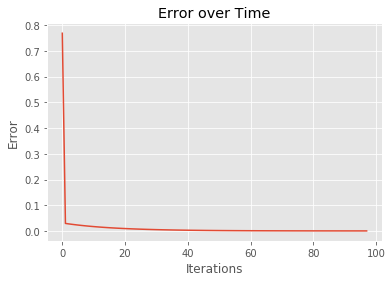

In [282]:
# Plotting error as iterations
plt.plot(err)
plt.title('Error over Time')
plt.xlabel('Iterations')
plt.ylabel('Error')

# Problem 4

In [284]:
# Initialize random starting point and learning rate
w = np.random.rand(Xtrain.shape[1])
s_norm = np.linalg.norm(Xtrain,2)**2
lam = 10/s_norm #found by checking results via input

# defining functions as parameters
func = L
grad = grad_L

# Pass to gradient solver (either stopping at n steps or going until tolerance)
steps = 200
step_flag = 0
w_trained, err, i = gradientDescentSolver(w, func, grad, lam, steps, step_flag, rho, c, 0)

Step: 1000 | Error: 0.0009027922738668025
Step: 2000 | Error: 0.00046056497189428874
Step: 3000 | Error: 0.0003132177192582796
Step: 4000 | Error: 0.0002380599376708304
Step: 5000 | Error: 0.0001922261036767847
Step: 6000 | Error: 0.00016137352462956405
Step: 7000 | Error: 0.00013920296818435487
Step: 8000 | Error: 0.00012249543891768833
Step: 9000 | Error: 0.00010944309902551278


In [285]:
w_trained

array([-0.12152323, -0.07743442, -0.12128494,  0.67719567,  0.47514765,
        0.22426866,  1.01986852,  0.48666445,  0.10341829,  0.13564389,
       -0.05754433, -0.20538   , -0.28635861,  0.24547673,  0.41082321,
        0.53945798,  0.54091938, -0.07565782,  0.10782846,  0.24684056,
        0.20573028,  0.27305528,  0.6222168 ,  0.60279888, -1.27140862,
        0.00219991, -1.86557668,  0.18126886, -0.08153031,  0.15457658,
        0.23997635,  0.47148904, -0.12989843,  0.04906652, -0.30534563,
        0.5241535 , -0.37362651,  0.1378691 , -0.25497248, -0.15958472,
       -0.26440828, -0.7791994 , -0.43962487, -0.55961741, -0.40973756,
       -0.88087768,  0.27147386, -0.6015913 , -0.31472979, -0.0677212 ,
        0.17662656,  0.80043204,  1.46095174, -0.03693715,  0.55506246,
        0.15397878,  0.23794897])

In [286]:
# Quick accuracy calculator for this problem
def acc(y_pred, y_true):
    m = y_pred - y_true
    m = np.sum(m == 0)
    return np.sum(m)/y_true.shape[0]

# Predicting labels with classifier w
y_pred = sig(Xtest@w_trained)
y_pred_train = sig(Xtrain@w_trained)

# if simga(w^Tx_i) > 0.5, then classify it as spam (1).
for i in range(len(y_pred)):
    if y_pred[i] > 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = -1
for i in range(len(y_pred_train)):
    if y_pred_train[i] > 0.5:
        y_pred_train[i] = 1
    else:
        y_pred_train[i] = -1

# Compute training and testing accuracy
accuracy = acc(y_pred, ytest)
accuracy_train = acc(y_pred_train, ytrain)

# Computer Classification error
misclassifyrate = 1 - accuracy
misclassifyrate_train = 1 - accuracy_train

print(f'Accuracy: {accuracy:0.4f} | Misclassification Rate: {misclassifyrate:0.4f}')
print(f'Accuracy(training): {accuracy_train:0.4f} | Misclassification Rate(training): {misclassifyrate_train:0.4f}')

Accuracy: 0.9434 | Misclassification Rate: 0.0566
Accuracy(training): 0.9491 | Misclassification Rate(training): 0.0509


In [288]:
# The features that would be most important would be the ones with the most activation (highest valued weights). We can find this by doing an argsort.

# Top 10 features
n = 10
top_n_features = w_trained.argsort()[::-1][:n]
top_n_features

# Check the features that correspond to the given columns!

array([52,  6, 51,  3, 22, 23, 54, 16, 15, 35], dtype=int64)